In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

In [5]:
data_dev = data[0:1000].T # thousand examples of 28 by 28 image 

In [6]:
data_dev

array([[9, 6, 0, ..., 9, 5, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [8]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [9]:
Y_train

array([4, 2, 1, ..., 9, 1, 3], dtype=int64)

In [10]:
X_train[:,0].shape

(784,)

In [11]:
X_train[:,0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
np.random.rand(3, 2) - 0.5

array([[-0.08885322, -0.17319017],
       [ 0.26166898,  0.43990387],
       [ 0.11904832, -0.42945935]])

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [14]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [15]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [16]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

2) Backward Propagation

In [17]:
def ReLU_deriv(Z):
    return Z > 0

In [18]:
def one_hot(Y):
    # print(Y.size, Y.max()) ---output----> 41000 9
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [19]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [20]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)

predictions == Y
This part of the expression is performing an element-wise comparison between two arrays: predictions and Y.

predictions is an array of predicted values, and Y is an array of true labels or values.

The == operator is used to compare each element of predictions with the corresponding element of Y. This operation is also known as broadcasting.

For example, if predictions is [0.1, 0.3, 0.5, 0.7] and Y is [0, 1, 1, 0], the comparison predictions == Y would result in an array like this: [False, False, True, False]

In [22]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [23]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [28]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.05, 1500)

Iteration:  0
[4 4 4 ... 4 4 9] [4 2 1 ... 9 1 3]
0.11173170731707317
Iteration:  10
[5 4 3 ... 7 9 9] [4 2 1 ... 9 1 3]
0.12097560975609756
Iteration:  20
[5 6 3 ... 7 9 9] [4 2 1 ... 9 1 3]
0.1888780487804878
Iteration:  30
[5 6 1 ... 7 0 6] [4 2 1 ... 9 1 3]
0.2546341463414634
Iteration:  40
[5 6 1 ... 7 0 6] [4 2 1 ... 9 1 3]
0.3149512195121951
Iteration:  50
[5 6 1 ... 7 0 6] [4 2 1 ... 9 1 3]
0.3676341463414634
Iteration:  60
[4 6 1 ... 7 1 6] [4 2 1 ... 9 1 3]
0.4202682926829268
Iteration:  70
[4 6 1 ... 7 1 6] [4 2 1 ... 9 1 3]
0.46319512195121954
Iteration:  80
[4 6 1 ... 7 1 6] [4 2 1 ... 9 1 3]
0.4995609756097561
Iteration:  90
[4 6 1 ... 7 1 6] [4 2 1 ... 9 1 3]
0.5291951219512195
Iteration:  100
[4 6 1 ... 9 1 6] [4 2 1 ... 9 1 3]
0.5551219512195122
Iteration:  110
[4 6 1 ... 9 1 6] [4 2 1 ... 9 1 3]
0.5787317073170731
Iteration:  120
[4 6 1 ... 9 1 6] [4 2 1 ... 9 1 3]
0.5978536585365853
Iteration:  130
[4 6 1 ... 9 1 6] [4 2 1 ... 9 1 3]
0.6156341463414634
Iteration:  14

In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


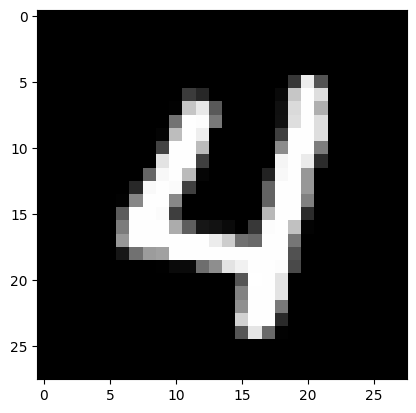

Prediction:  [2]
Label:  2


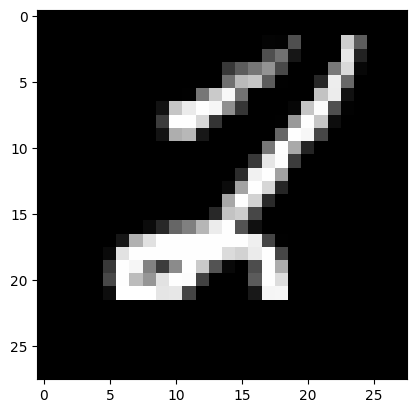

Prediction:  [1]
Label:  1


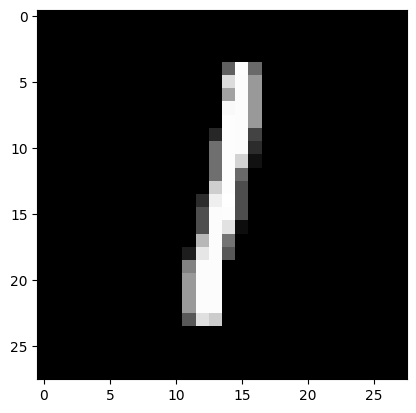

Prediction:  [1]
Label:  1


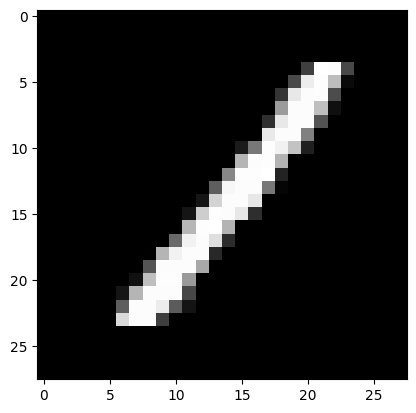

Prediction:  [0]
Label:  0


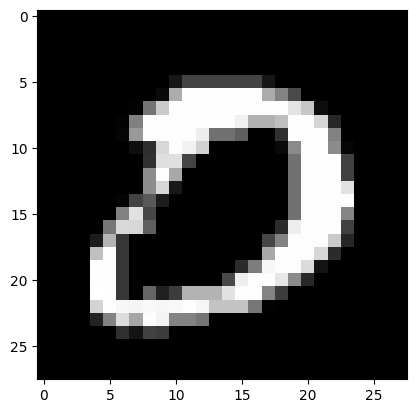

Prediction:  [6]
Label:  5


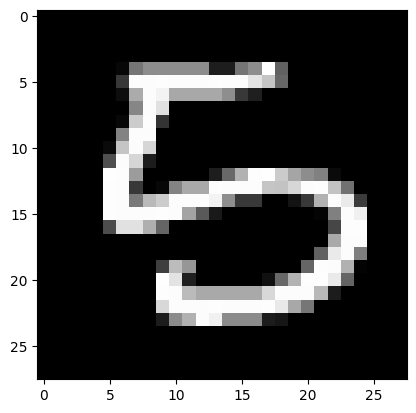

Prediction:  [9]
Label:  9


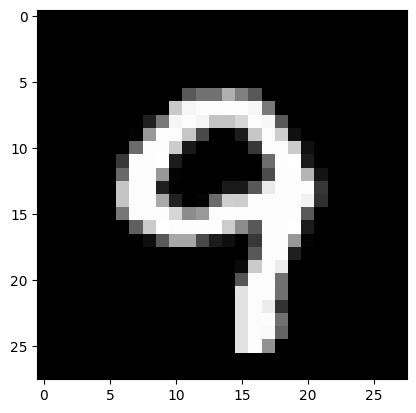

Prediction:  [3]
Label:  3


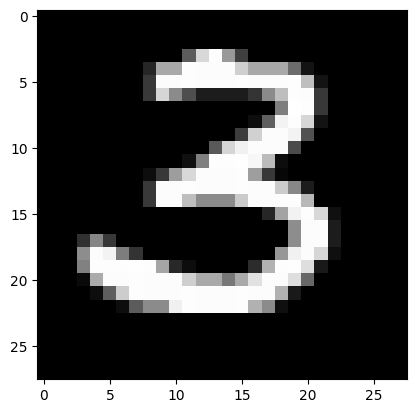

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(101, W1, b1, W2, b2)
test_prediction(102, W1, b1, W2, b2)
test_prediction(105, W1, b1, W2, b2)

In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 6 0 1 7 3 9 4 2 2 0 1 3 1 9 6 0 5 6 5 3 2 1 2 2 7 8 3 0 8 2 8 5 5 5 9 7
 6 6 9 3 9 9 8 1 4 4 1 4 4 9 2 7 6 5 7 3 3 9 8 1 2 7 5 1 9 2 6 9 0 9 7 5 6
 1 2 6 0 8 6 2 9 2 1 3 4 8 7 8 9 9 3 5 8 4 5 0 7 4 4 1 1 6 0 4 3 9 7 1 6 3
 4 5 5 9 0 0 6 3 7 7 8 5 6 3 4 6 4 9 9 4 8 0 4 7 1 9 6 2 8 8 6 9 9 7 5 8 6
 5 7 4 5 6 6 9 3 9 5 2 2 0 2 4 7 8 7 8 5 9 9 4 6 1 0 7 3 7 0 9 7 3 2 5 6 4
 1 2 9 1 3 6 8 0 9 0 2 7 2 9 9 4 5 4 0 4 2 6 5 7 9 7 1 1 2 7 9 2 3 8 7 5 6
 0 8 2 5 0 5 9 1 4 6 1 4 1 5 3 5 3 1 1 6 1 3 4 9 9 1 6 8 8 4 8 2 5 1 6 8 4
 6 0 8 9 3 8 6 0 7 4 8 2 3 2 3 6 8 1 0 0 1 6 8 9 9 8 9 0 9 3 3 6 1 0 2 2 4
 8 1 3 3 7 4 5 1 7 3 6 1 5 6 7 9 8 9 4 3 7 4 6 2 3 5 1 8 6 7 5 7 2 1 3 1 1
 2 0 1 8 5 3 5 7 4 8 8 8 1 9 5 0 8 6 2 7 1 5 3 0 1 6 8 8 2 2 1 1 0 6 5 1 2
 2 0 5 0 2 6 3 7 9 6 6 5 8 3 7 1 3 8 1 2 7 9 7 6 4 6 5 1 1 7 2 2 4 2 2 5 9
 1 7 5 0 1 5 1 3 1 9 0 6 6 6 5 8 5 6 1 8 8 9 6 9 8 6 8 0 4 8 8 6 1 7 4 4 4
 6 7 7 5 8 2 9 5 2 9 3 8 2 8 7 0 3 8 0 1 6 1 1 5 2 7 9 6 6 6 6 6 8 8 5 9 7
 0 9 8 4 7 2 2 7 1 6 1 9 

0.867